<a href="https://colab.research.google.com/github/jberkow713/DS-Unit-1-Sprint-2-Statistics/blob/master/Q_A_CHI_2_statistic%2C_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

print(df.shape)
df.head()

(517, 13)


X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

# Chi^2 tests

ONLY the Chi^2 test for independence:

In [0]:
# identify categorical variables

df.describe(exclude='number')

month  day
count    517  517
unique    12    7
top      aug  sun
freq     184   95

In [0]:
df.describe()

X           Y        FFMC  ...        wind        rain         area
count  517.000000  517.000000  517.000000  ...  517.000000  517.000000   517.000000
mean     4.669246    4.299807   90.644681  ...    4.017602    0.021663    12.847292
std      2.313778    1.229900    5.520111  ...    1.791653    0.295959    63.655818
min      1.000000    2.000000   18.700000  ...    0.400000    0.000000     0.000000
25%      3.000000    4.000000   90.200000  ...    2.700000    0.000000     0.000000
50%      4.000000    4.000000   91.600000  ...    4.000000    0.000000     0.520000
75%      7.000000    5.000000   92.900000  ...    4.900000    0.000000     6.570000
max      9.000000    9.000000   96.200000  ...    9.400000    6.400000  1090.840000

[8 rows x 11 columns]

# chi^2 test for month & day

In [0]:
df['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [0]:
df['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
jan      2
may      2
nov      1
Name: month, dtype: int64

Null Hypothesis: Day of the week and month are independent

Alternative: They are dependent

Confidence Level: 95%

In [0]:
# contingency table (crosstab)

observed = pd.crosstab(df['day'], df['month'])

observed

month  apr  aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sep
day                                                              
fri      1   21    1    5    0    3    3   11    1    0    1   38
mon      1   15    4    3    0    4    3   12    0    0    4   28
sat      1   29    0    4    1    8    2   10    1    0    3   25
sun      3   40    1    4    1    5    4    7    0    0    3   27
thu      2   26    1    1    0    3    2    5    0    0    0   21
tue      0   28    1    2    0    6    0    5    0    1    2   19
wed      1   25    1    1    0    3    3    4    0    0    2   14

In [0]:
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

(64.23831777674378,
 0.5384475410453674,
 66,
 array([[ 1.47969052, 30.25145068,  1.47969052,  3.28820116,  0.32882012,
          5.26112186,  2.79497099,  8.87814313,  0.32882012,  0.16441006,
          2.46615087, 28.27852998],
        [ 1.28820116, 26.33655706,  1.28820116,  2.86266925,  0.28626692,
          4.58027079,  2.43326886,  7.72920696,  0.28626692,  0.14313346,
          2.14700193, 24.61895551],
        [ 1.4622824 , 29.89555126,  1.4622824 ,  3.24951644,  0.32495164,
          5.19922631,  2.76208897,  8.77369439,  0.32495164,  0.16247582,
          2.43713733, 27.94584139],
        [ 1.65377176, 33.81044487,  1.65377176,  3.67504836,  0.36750484,
          5.88007737,  3.1237911 ,  9.92263056,  0.36750484,  0.18375242,
          2.75628627, 31.60541586],
        [ 1.06189555, 21.7098646 ,  1.06189555,  2.35976789,  0.23597679,
          3.77562863,  2.00580271,  6.37137331,  0.23597679,  0.11798839,
          1.76982592, 20.29400387],
        [ 1.11411992, 22.77756286,

Conclusion: Based on a chi^2 statistic of 64.2 and a p_value of .53, I (reject / **fail to reject**) the null hypothesis that day of the week and month of the year of forest fires are independent.

## t-tests (Iris Dataset)

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

print(df.shape)
df.head()

(150, 5)


sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

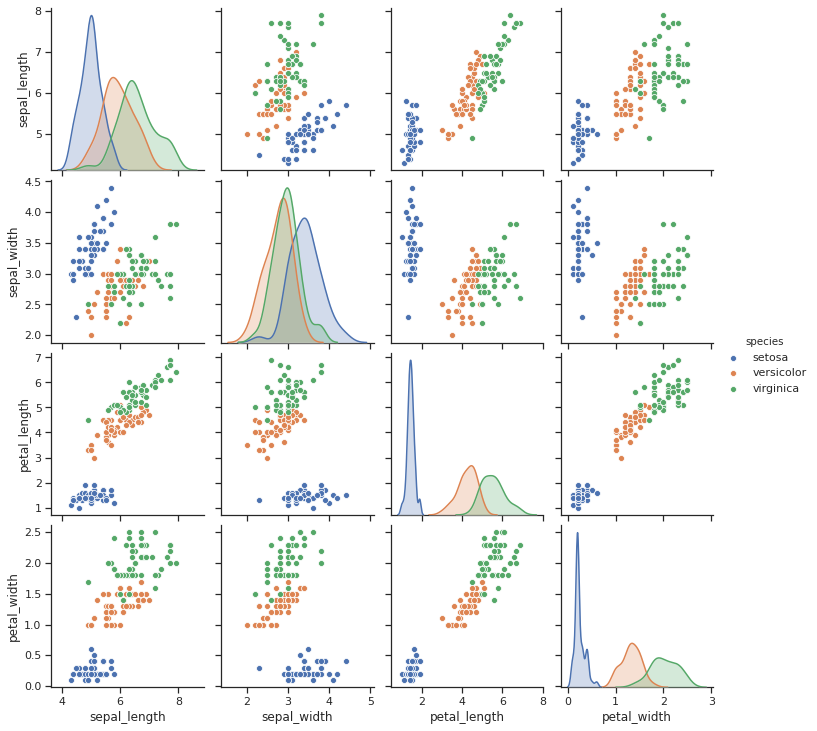

In [0]:
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue='species')

In [0]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [0]:
versicolor = df[df['species'] == 'Iris-versicolor']
virginica = df[df['species'] == 'Iris-virginica']
setosa = df[df['species'] == 'Iris-setosa']

# T-tests for average sepal width between these species

virginica vs setosa

versicolor vs virginica

versicolor vs setosa

## 2-sample t-tests

Null Hypothesis: The two sample means are equal

Alternative: The sample means are not equal

Confidence Level: 95%

In [0]:
stats.ttest_ind(virginica['sepal_width'], setosa['sepal_width'])

Ttest_indResult(statistic=-6.289384996672061, pvalue=8.916634067006443e-09)

We reject the null hypothesis that average sepal width of virginica and setosa flowers is the same and suggest the alternative that they are different. 

In [0]:
stats.ttest_ind(versicolor['sepal_width'], virginica['sepal_width'])

Ttest_indResult(statistic=-3.2057607502218186, pvalue=0.0018191004238894803)

We reject the null hypothesis that average sepal width of versicolor and virginica flowers is the same and suggest the alternative that they are different. 

In [0]:
stats.ttest_ind(versicolor['sepal_width'], setosa['sepal_width'])

Ttest_indResult(statistic=-9.282772555558111, pvalue=4.362239016010214e-15)

We reject the null hypothesis that average sepal width of versicolor and setosa flowers is the same and suggest the alternative that they are different. 

## 1 sample t-tests

Null Hypothesis: sepal width of virginica flowers is 3 centimeters

Alternative Hypothesis: sepal width of virginica flowers is different than 3 centimeters

Confidence Level: 95%

In [0]:
stats.ttest_1samp(virginica['sepal_width'], 3)

Ttest_1sampResult(statistic=-0.5700765259143086, pvalue=0.5712305612208275)

Due to a t-statistic of -.57 and a p-value of .5712, I fail to reject the null hypothesis that the average sepal width of verginica iris flowers is different than 3 centimeters.

In [0]:
virginica['sepal_width'].mean()

2.9739999999999998

## `stats.chi2_contingency` vs `stats.chi2`

**chi2_contingency**: tests for independence between two categorical variables.

chi2: (test for goodness of fit) Test that a single variable of observed frequencies is equal to set known expected frequencies. (1 variable involved here)

All Hypothesis Tests:

Test Statistic: (t-statistic, chi^2 statistic, etc.)

As our Test Statistic ^^^^GOES UP^^^^ our p-value vvvv GOES DOWN vvvv

P-value is the likelihood of our null hypothesis being true **given** the sample that we have collected.

As p-value goes down, we get closer to rejecting the null hypothesis (p<.05  -> REJECT!)

As p-value goes up, we fail to reject the null hypothesis (P>=.05 -> Fail to Reject!)